# Setting up Kaggle 

install the kaggle library

In [ ]:
! pip install kaggle

Create **.kaggle** directory

In [ ]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


Add your token json file in the .kaggle directory

In [ ]:

import json

token = {"username":"your-username","key":"your-key"}

with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

Copy the kaggle.json file from content to it's location in kaggle directory

In [ ]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

Configure it

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


lock the key using chmod 600 to make it not visible to other users on the system

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

Now you areready, you can list kaggle datasets and download any dataset etc etc

In [ ]:
!kaggle datasets list

ref                                                    title                                          size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
vjchoudhary7/customer-segmentation-tutorial-in-python  Mall Customer Segmentation Data                 2KB  2018-08-11 07:23:02          17723  
russellyates88/suicide-rates-overview-1985-to-2016     Suicide Rates Overview 1985 to 2016           396KB  2018-12-01 19:18:25          42338  
iarunava/cell-images-for-detecting-malaria             Malaria Cell Images Dataset                   337MB  2018-12-05 05:40:21           9649  
bigquery/crypto-ethereum-classic                       Ethereum Classic Blockchain                    70GB  2019-03-20 23:21:25              0  
jessicali9530/stanford-dogs-dataset                    Stanford Dogs Dataset                         735MB  2019-02-13 05:45:25   

In [ ]:
!kaggle datasets list -s sentiment

ref                                                    title                                           size  lastUpdated          downloadCount  
-----------------------------------------------------  --------------------------------------------  ------  -------------------  -------------  
harriken/emoji-sentiment                               Emoji sentiment                                 13MB  2017-10-01 09:56:54           1925  
crowdflower/twitter-airline-sentiment                  Twitter US Airline Sentiment                     3MB  2016-10-06 03:11:23          25579  
bittlingmayer/amazonreviews                            Amazon Reviews for Sentiment Analysis          493MB  2017-05-24 13:05:13          14016  
kazanova/sentiment140                                  Sentiment140 dataset with 1.6 million tweets    84MB  2017-09-13 22:43:19          11704  
crowdflower/first-gop-debate-twitter-sentiment         First GOP Debate Twitter Sentiment               3MB  2016-10-06 03:1

# Malaria Detection

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria -p /content

 95% 319M/337M [00:02<00:00, 135MB/s]
100% 337M/337M [00:02<00:00, 135MB/s]


In [ ]:
import os
import zipfile

local_zip = '/content/cell-images-for-detecting-malaria.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/cell-images-for-detecting-malaria')
zip_ref.close()


In [ ]:
# # Directory with our training unifected pictures
infected_dir = os.path.join('/content/cell-images-for-detecting-malaria/cell_images/Uninfected')

# Directory with our training infected or parasitized pictures
uninfected_dir = os.path.join('/content/cell-images-for-detecting-malaria/cell_images/Parasitized')

In [ ]:
print(len(os.listdir(infected_dir)))
print(len(os.listdir(uninfected_dir)))

13780
13780


Split the data

In [ ]:
try:
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/training')
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/testing')
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/training/uninfected')
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/training/infected')
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/testing/uninfected')
    os.mkdir('/content/cell-images-for-detecting-malaria/cell_images/testing/infected')
except OSError as e:
    print('error:', e)
    pass

In [ ]:
import random 
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


INFECTED_SOURCE_DIR = "/content/cell-images-for-detecting-malaria/cell_images/Parasitized/"
TRAINING_INFECTED_DIR = "/content/cell-images-for-detecting-malaria/cell_images/training/infected/"
TESTING_INFECTED_DIR = "/content/cell-images-for-detecting-malaria/cell_images/testing/infected/"
UNINFECTED_SOURCE_DIR = "/content/cell-images-for-detecting-malaria/cell_images/Uninfected/"
TRAINING_UNINFECTED_DIR = "/content/cell-images-for-detecting-malaria/cell_images/training/uninfected/"
TESTING_UNINFECTED_DIR = "/content/cell-images-for-detecting-malaria/cell_images/testing/uninfected/"

split_size = .9
split_data(INFECTED_SOURCE_DIR, TRAINING_INFECTED_DIR, TESTING_INFECTED_DIR, split_size)
split_data(UNINFECTED_SOURCE_DIR, TRAINING_UNINFECTED_DIR, TESTING_UNINFECTED_DIR, split_size)

In [ ]:
train_infected_names = os.listdir(TRAINING_INFECTED_DIR)
print(train_infected_names[:10])

train_uninfected_names = os.listdir(TRAINING_UNINFECTED_DIR)
print(train_uninfected_names[:10])

['C182P143NThinF_IMG_20151201_172216_cell_175.png', 'C39P4thinF_original_IMG_20150622_105102_cell_80.png', 'C187P148NThinF_IMG_20151203_154503_cell_155.png', 'C174P135NThinF_IMG_20151127_135554_cell_201.png', 'C59P20thinF_IMG_20150803_111333_cell_144.png', 'C81P42ThinF_IMG_20150817_120712_cell_159.png', 'C97P58ThinF_IMG_20150917_145555_cell_171.png', 'C130P91ThinF_IMG_20151004_141504_cell_144.png', 'C93P54ThinF_IMG_20150821_164024_cell_200.png', 'C132P93ThinF_IMG_20151004_152808_cell_18.png']
['C168P129ThinF_IMG_20151118_154126_cell_106.png', 'C174P135NThinF_IMG_20151127_135311_cell_162.png', 'C61P22N_ThinF_IMG_20150818_112252_cell_26.png', 'C173P134NThinF_IMG_20151130_115339_cell_126.png', 'C215ThinF_IMG_20151106_133043_cell_18.png', 'C2NThinF_IMG_20150604_114631_cell_144.png', 'C96P57ThinF_IMG_20150824_112132_cell_161.png', 'C52P13thinF_IMG_20150725_124830_cell_140.png', 'C136P97ThinF_IMG_20151005_144727_cell_100.png', 'C58P19thinF_IMG_20150802_122215_cell_67.png']


In [ ]:
test_infected_names = os.listdir(TESTING_INFECTED_DIR)
print(test_infected_names[:10])

test_uninfected_names = os.listdir(TESTING_UNINFECTED_DIR)
print(test_uninfected_names[:10])

['C129P90ThinF_IMG_20151004_133538_cell_84.png', 'C132P93ThinF_IMG_20151004_151811_cell_147.png', 'C174P135NThinF_IMG_20151127_135342_cell_230.png', 'C167P128ReThinF_IMG_20151201_105707_cell_231.png', 'C68P29N_ThinF_IMG_20150819_133447_cell_123.png', 'C136P97ThinF_IMG_20151005_140646_cell_120.png', 'C184P145ThinF_IMG_20151203_104334_cell_32.png', 'C99P60ThinF_IMG_20150918_141351_cell_106.png', 'C62P23N_ThinF_IMG_20150818_133527_cell_194.png', 'C180P141NThinF_IMG_20151201_163751_cell_157.png']
['C119P80ThinF_IMG_20151002_124425_cell_73.png', 'C178P139NThinF_IMG_20151201_155012_cell_99.png', 'C92P53ThinF_IMG_20150821_151646_cell_20.png', 'C119P80ThinF_IMG_20151002_122720_cell_53.png', 'C146P107ThinF_IMG_20151018_135703_cell_35.png', 'C51AP12thinF_IMG_20150724_161126_cell_86.png', 'C52P13thinF_IMG_20150725_125847_cell_44.png', 'C181P142ThinF_IMG_20151127_155914_cell_45.png', 'C171P132ThinF_IMG_20151119_153347_cell_143.png', 'C237ThinF_IMG_20151127_104844_cell_222.png']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

(100, 103, 3)
(127, 148, 3)
(148, 133, 3)
(160, 148, 3)
(118, 145, 3)
(142, 148, 3)
(115, 133, 3)
(100, 130, 3)
(139, 139, 3)
(121, 121, 3)
(139, 151, 3)
(133, 106, 3)
(166, 154, 3)
(145, 130, 3)
(121, 145, 3)
(130, 166, 3)


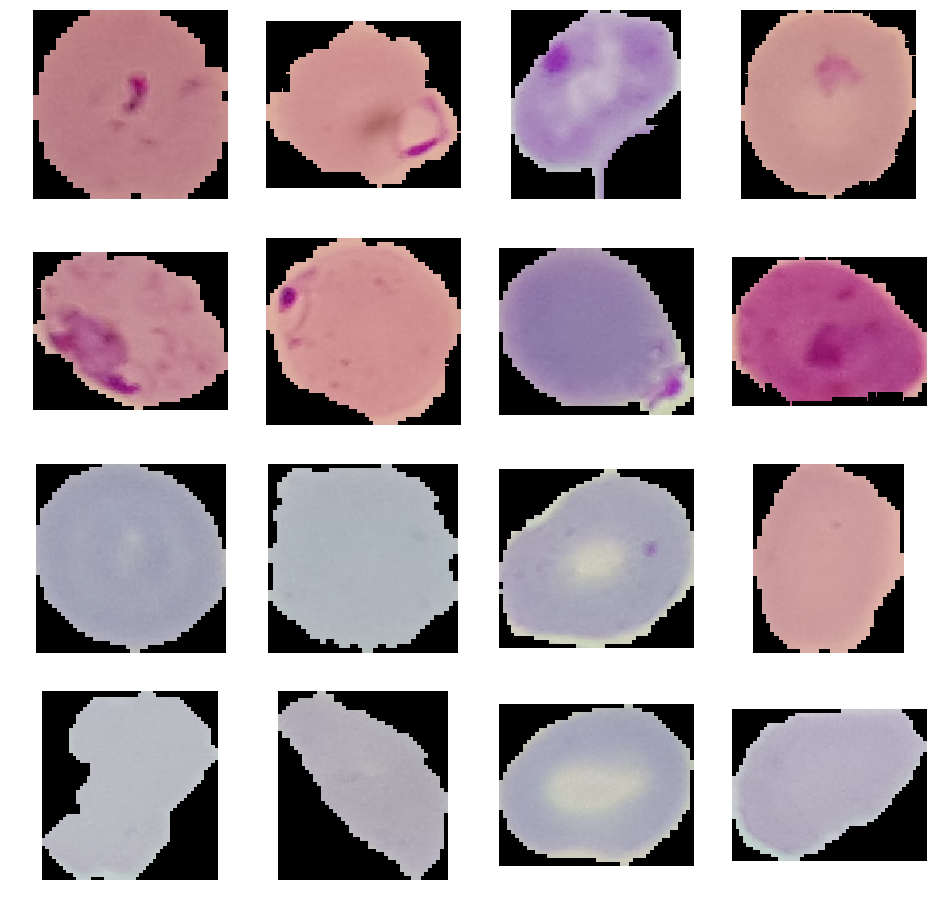

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_infected_pix = [os.path.join(TRAINING_INFECTED_DIR, fname) 
                for fname in train_infected_names[pic_index-8:pic_index]]
next_uninfected_pix = [os.path.join(TRAINING_UNINFECTED_DIR, fname) 
                for fname in train_uninfected_names[pic_index-8:pic_index]]


for i, img_path in enumerate(next_infected_pix+next_uninfected_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  print(img.shape)
  plt.imshow(img)

plt.show()

# Connect to Drive

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 130912 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.3-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.3-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

# Building Model

In [ ]:
import tensorflow as tf

In [ ]:
checkpoint_path = "drive/app/malaria_detection/checkpoints/training.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 period=3)

In [ ]:
def save_model(model):
  # Save the weights
  model.save_weights('drive/app/malaria_detection/checkpoints/malaria_det.ckpt')
  # Save entire model to a HDF5 file
  model.save('drive/app/malaria_detection/malaria_det_model.h5')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(80, 80, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class (uninfected) and 0 class (infected)
    tf.keras.layers.Dense(1, activation='sigmoid')
]
)

In [ ]:

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 78, 78, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 39, 39, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 37, 37, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 18, 18, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 256 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/cell-images-for-detecting-malaria/cell_images/training/',  # This is the source directory for training images
        target_size=(80, 80),  # All images will be resized to 96x96
        batch_size=256,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 24802 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=15,
      verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
97/97 [==============================] - 183s 2s/step - loss: 0.6421 - acc: 0.6319
Epoch 2/15
97/97 [==============================] - 182s 2s/step - loss: 0.3013 - acc: 0.8681
Epoch 3/15
97/97 [==============================] - 180s 2s/step - loss: 0.1876 - acc: 0.9292
Epoch 4/15
97/97 [==============================] - 180s 2s/step - loss: 0.1676 - acc: 0.9429
Epoch 5/15
97/97 [==============================] - 181s 2s/step - loss: 0.1547 - acc: 0.9488
Epoch 6/15
97/97 [==============================] - 184s 2s/step - loss: 0.1404 - acc: 0.9542
Epoch 7/15
97/97 [==============================] - 181s 2s/step - loss: 0.1278 - acc: 0.9569
Epoch 8/15
97/97 [==============================] - 181s 2s/step - loss: 0.1213 - acc: 0.9590
Epoch 9/15
97/97 [==============================] - 182s 2s/step - loss: 0.1116 - acc: 0.9616
Epoch 10/15
97/97 [==============================] - 181s 2s/step - loss: 0.1075 - acc: 0.9630
Epoch 11/15

save the model after this 

In [ ]:
save_model(model)


Consider using a TensorFlow optimizer from `tf.train`.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


<Figure size 432x288 with 0 Axes>

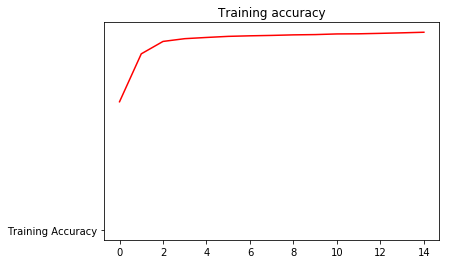

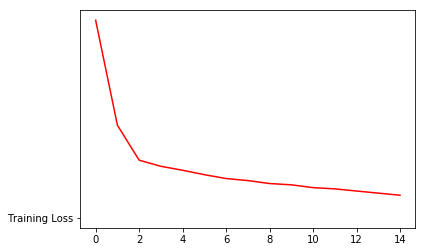

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
# val_acc=history.history['val_acc']
loss=history.history['loss']
# val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
# plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
# plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()

# Predict on test data

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        '/content/cell-images-for-detecting-malaria/cell_images/testing/',
        target_size=(80, 80),
        color_mode="rgb",
        shuffle = False,
        class_mode='binary',
        batch_size=1)

filenames = test_generator.filenames
nb_samples = len(filenames)

predict = model.predict_generator(test_generator,steps = nb_samples, verbose=1)

Found 2756 images belonging to 2 classes.
2756/2756 [==============================] - 15s 5ms/step


In [ ]:
loss, acc = model.evaluate_generator(test_generator, steps=nb_samples)

In [ ]:
loss

0.14026699966237605

In [ ]:
acc

0.95174164